<a href="https://colab.research.google.com/github/Lirgis0/Gamedev_research/blob/main/project_final_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [ ]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

## Загрузка и знакомство с датасетом

### Загрузка

In [ ]:
df = pd.read_csv('.../game_actions.csv')
ad = pd.read_csv('.../ad_costs.csv')
user = pd.read_csv('.../user_source.csv')

### Знакомство

In [ ]:
df.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Столбец с датами не приведен к datetime. разберемся с этим на предобработке.

In [ ]:
df['event_datetime'].min()

'2020-05-04 00:00:01'

In [ ]:
df['event_datetime'].max()

'2020-06-05 12:32:49'

 Похоже что в датасете собраны данные за месяц. 

In [ ]:
df['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [ ]:
df['event'].value_counts()

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

С эвентами ознакомились. 

In [ ]:
df['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

In [ ]:
df['building_type'].isna().mean()

0.05664258330875848

Больше 5% пропусков, посмотрим с чем это может быть связано:

In [ ]:
df[df['event'] == 'project'].sample(5)

,event_datetime,event,building_type,user_id,project_type
134631,2020-05-25 07:56:29,project,NaN,0136963c-c45c-4edb-92d8-205bd50a4d36,satellite_orbital_assembly
121207,2020-05-17 06:10:07,project,NaN,b3bc0ec8-eb86-4fe1-8925-99d95d1179e7,satellite_orbital_assembly
95478,2020-05-13 03:02:24,project,NaN,63acfeb2-0d48-413c-89b2-3d7d6484cada,satellite_orbital_assembly
120601,2020-05-17 02:57:00,project,NaN,960c9883-6d91-43f2-8fbb-bb93a06d5c25,satellite_orbital_assembly
80234,2020-05-11 05:21:15,project,NaN,64ecf027-0cc6-4435-905f-c58d1c081a91,satellite_orbital_assembly


In [ ]:
df[df['event'] == 'finished_stage_1'].sample(5)

,event_datetime,event,building_type,user_id,project_type
116028,2020-05-16 04:48:05,finished_stage_1,NaN,9035c3ea-4752-4e47-b4f0-d9db5d90e37b,NaN
133730,2020-05-23 14:11:28,finished_stage_1,NaN,d7b27c4b-2ff5-46ff-9d42-aadd01ff055a,NaN
129529,2020-05-20 04:37:08,finished_stage_1,NaN,6a0a313a-6c48-43ff-8adb-b781400bdd56,NaN
108916,2020-05-14 23:50:29,finished_stage_1,NaN,9d947423-b393-4a63-bcb3-3311a5ccd8dd,NaN
134719,2020-05-25 14:05:51,finished_stage_1,NaN,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN


 Похоже что пропуски в building_type связаны с тем, что не все эвенты связаны со строительством зданий, поэтому, когда эвент это победа над врагом или сборка орбитальной группировки спутников в таком случае пропуск.Значит его обрабатывать не нужно. Проверим дополнительно:  

In [ ]:
df[df['event'] == 'finished_stage_1']['building_type'].isna().mean()

1.0

In [ ]:
df[df['event'] == 'project']['building_type'].isna().mean()

1.0

 Так и есть во всех случаях завершения первого уровня в building_type  пропуски. 

In [ ]:
df['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

В целом с основным датафреймом закончили.  

In [ ]:
ad.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77


In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [ ]:
ad['source'].value_counts()

facebook_ads               7
instagram_new_adverts      7
yandex_direct              7
youtube_channel_reklama    7
Name: source, dtype: int64

 Четыре рекламных источника,по 7 дней рекламы каждый. 

In [ ]:
user.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [ ]:
user['source'].unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

Те же четыре рекламных канала. В целом с этим все ясно.

In [ ]:
user['user_id'].nunique()

13576

### Вывод

С данными ознакомились, приступим к предобработке. 

## Предобработка данных

### Поиск и удаление дубликатов

In [ ]:
df.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [ ]:
df=df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.duplicated().sum()

0

 Дубликаты в основном датафрейме удалены, теперь посмотрим датафрейм user, в дата фрейме ad дубликатов нет, я посмотрел глазами

In [ ]:
user.duplicated().sum()

0

Дубликаты обработаны 

### Поиск и обработка пропусков

In [ ]:
df.isna().mean()

event_datetime   0.00
event            0.00
building_type    0.06
user_id          0.00
project_type     0.99
dtype: float64

Мы определили на этапе знакомства с данными, что эти пропуски несут смысл,думаю, что пока не буду ставить заглушки.

### Приведение данных к нужному типу

In [ ]:
df['event_datetime'] = pd.to_datetime(df['event_datetime'])

In [ ]:
df['event_datetime'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  135639
unique                 128790
top       2020-05-09 21:49:07
freq                        4
first     2020-05-04 00:00:01
last      2020-06-05 12:32:49
Name: event_datetime, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [ ]:
ad['day'] = pd.to_datetime(ad['day'])

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


Привели данные к datetime  в двух датасетах 

### Вывод

 С предобработкой закончено, приступим к анализу  

## Исседовательский анализ данных

Задача: Проанализировать поведение игроков в зависимости от источника перехода.

### Определить долю закончивших первый уровень.

In [ ]:
df.head(3)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN


In [ ]:
def level(x):
  if x == 'finished_stage_1':
    return 1
  else:
    return 0

In [ ]:
df['level_up'] = df['event'].apply(level)

In [ ]:
df['level_up'].mean()

0.042885895649481344

Доля *событий*, которые привели к окончанию уровня ~4,3%

In [ ]:
t = df.groupby('level_up')['user_id'].nunique().reset_index()
t.columns = ['level_up', 'user_count']
t['perc'] = t['user_count']/t['user_count'].sum()
t

,level_up,user_count,perc
0,0,13576,0.70
1,1,5817,0.30


Доля игроков перешедших на 2 уровень: 30%.

### Определить наиболее выгодный источник привлечения пользователей.

In [ ]:
ad.head(1)

,source,day,cost
0,facebook_ads,2020-05-03,935.88


In [ ]:
user.head(1)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads


In [ ]:
ad_spend = ad.groupby('source')['cost'].sum().reset_index()
source = user.groupby('source')['user_id'].nunique().reset_index()
t = source.merge(ad_spend, on='source')
t

,source,user_id,cost
0,facebook_ads,2726,2140.90
1,instagram_new_adverts,3347,2161.44
2,yandex_direct,4817,2233.11
3,youtube_channel_reklama,2686,1068.12


In [ ]:
t['cost_per_user'] = t['cost']/t['user_id']
t

,source,user_id,cost,cost_per_user
0,facebook_ads,2726,2140.90,0.79
1,instagram_new_adverts,3347,2161.44,0.65
2,yandex_direct,4817,2233.11,0.46
3,youtube_channel_reklama,2686,1068.12,0.40


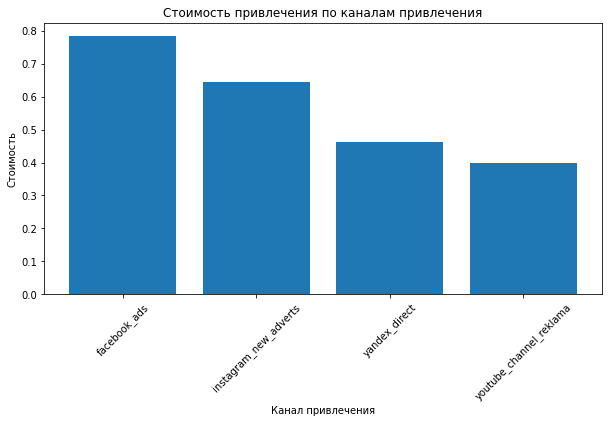

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(t['source'],t['cost_per_user'])
plt.title('Стоимость привлечения по каналам привлечения')
plt.xlabel('Канал привлечения')
plt.ylabel('Стоимость')
plt.xticks(rotation = 45)
plt.xticks(t['source'])
plt.show()


Я посчитал стоимость привлечения одного игрока за все время. Получилось,что дешевле всего обходятся игроки пришедшие по ссылке с ютуба, на втором месте яндекс. С фейсбука прихоят самые "дорогие" игроки,затраты на них практически в два раза выше.


### Определить какой вариант прохождения уровня выбирали игроки в зависимости от источника.

In [ ]:
df.head(1)

,event_datetime,event,building_type,user_id,project_type,level_up
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0


In [ ]:
user.head(1)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads


In [ ]:
df_lvlup = df[(df['event']=='finished_stage_1') | (df['event']=='project')]

In [ ]:
data = df_lvlup.drop(columns=['event_datetime', 'building_type', 'project_type', 'level_up']).reset_index(drop=True)
user_event = data.groupby('user_id')['event'].count().reset_index().sort_values(by='event')
user_event

,user_id,event
0,001d39dc-366c-4021-9604-6a3b9ff01e25,1
3544,9be412b2-c124-4062-baee-a81eb3f1e7fb,1
3542,9bd894a2-d5fd-42f9-9e07-fedaa9b5aaa8,1
3541,9bd5510f-e7be-42f3-bfbf-59a14331e8b1,1
3539,9bc89f26-1e56-4406-b99e-05de5c95ea21,1
...,...,...
1374,3a360726-d4aa-4255-ad6a-83bec343d201,2
3829,a8534de9-7f6d-49e3-9def-b7036f8805f3,2
1373,3a3173ce-a1f3-4da2-9cb4-97b2298c9f6f,2
3833,a861f288-ae64-4558-a094-cde0c48c9b67,2


 Получается,что те пользователи у кого 1 эвент - это те кто победил врага(только finished_stage_1), а те у кого 2 эвента - это те кто делал проект(И finished_stage_1, и project).

In [ ]:
t = user_event.merge(user, on='user_id')
t.nunique()

user_id    5817
event         2
source        4
dtype: int64

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5817 entries, 0 to 5816
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  5817 non-null   object
 1   event    5817 non-null   int64 
 2   source   5817 non-null   object
dtypes: int64(1), object(2)
memory usage: 181.8+ KB


In [ ]:
type_of_win_by_event = t.groupby(['source', 'event'])['user_id'].count().reset_index()
type_of_win_by_event

,source,event,user_id
0,facebook_ads,1,759
1,facebook_ads,2,391
2,instagram_new_adverts,1,990
3,instagram_new_adverts,2,476
4,yandex_direct,1,1422
5,yandex_direct,2,620
6,youtube_channel_reklama,1,780
7,youtube_channel_reklama,2,379


Посчитали сколько игроков побеждало разыми типами победы в абсолютных еденицах, теперь посчитаем в относительных:

In [ ]:
temp = t.groupby('source')['user_id'].count().reset_index()
temp.columns=['source','count']
temp

,source,count
0,facebook_ads,1150
1,instagram_new_adverts,1466
2,yandex_direct,2042
3,youtube_channel_reklama,1159


In [ ]:
type_of_win_by_event = type_of_win_by_event.merge(temp, on = 'source', how = 'left')
type_of_win_by_event

,source,event,user_id,count
0,facebook_ads,1,759,1150
1,facebook_ads,2,391,1150
2,instagram_new_adverts,1,990,1466
3,instagram_new_adverts,2,476,1466
4,yandex_direct,1,1422,2042
5,yandex_direct,2,620,2042
6,youtube_channel_reklama,1,780,1159
7,youtube_channel_reklama,2,379,1159


In [ ]:
type_of_win_by_event['perc_type_of_win'] = type_of_win_by_event['user_id']/type_of_win_by_event['count']
type_of_win_by_event

,source,event,user_id,count,perc_type_of_win
0,facebook_ads,1,759,1150,0.66
1,facebook_ads,2,391,1150,0.34
2,instagram_new_adverts,1,990,1466,0.68
3,instagram_new_adverts,2,476,1466,0.32
4,yandex_direct,1,1422,2042,0.70
5,yandex_direct,2,620,2042,0.30
6,youtube_channel_reklama,1,780,1159,0.67
7,youtube_channel_reklama,2,379,1159,0.33


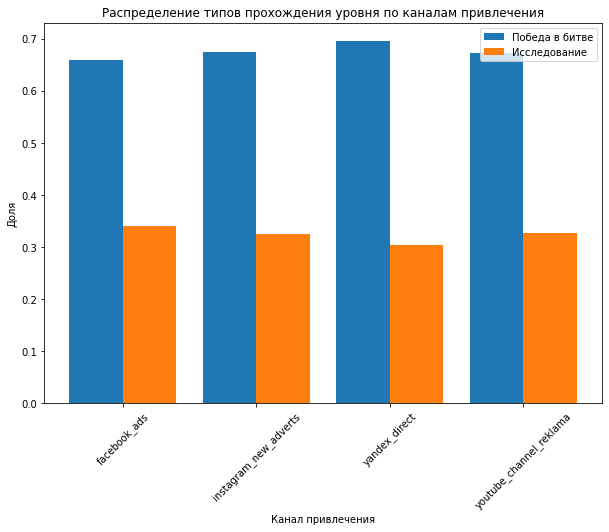

In [ ]:
plt.figure(figsize=(10,7))
width = 0.4
x = np.arange(4)
plt.bar(x-0.2,type_of_win_by_event['perc_type_of_win'][0::2], width=width,label='Победа в битве')
plt.bar(x+0.2,type_of_win_by_event['perc_type_of_win'][1::2], width=width,label='Исследование')
plt.legend()
plt.title('Распределение типов прохождения уровня по каналам привлечения')
plt.xlabel('Канал привлечения')
plt.ylabel('Доля')
plt.xticks(rotation = 45)
plt.xticks(x, type_of_win_by_event['source'].unique()) 
plt.show()

В целом в долях разница в пределах 4%, можем сказать,что она несущественна. 

### Определить какой процент привлеченных игроков закончил первый уровень в зависимости от источника

In [ ]:
df.head(1)

,event_datetime,event,building_type,user_id,project_type,level_up
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0


In [ ]:
user.head(1)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads


In [ ]:
data = df[df['level_up'] == 1].merge(user,on='user_id',how='left')
data.head()

,event_datetime,event,building_type,user_id,project_type,level_up,source
0,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,1,instagram_new_adverts
1,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,1,facebook_ads
2,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,1,youtube_channel_reklama
3,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,1,youtube_channel_reklama
4,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,1,facebook_ads


In [ ]:
t1= data.groupby('source')['user_id'].nunique().reset_index()
t2= user.groupby('source')['user_id'].nunique().reset_index()
t1.columns=['source','user_lvlup']
t2.columns=['source','user_all']
t1 = t1.merge(t2, on='source')
t1['perc_win_by_source'] = t1['user_lvlup']/t1['user_all']
t1

,source,user_lvlup,user_all,perc_win_by_source
0,facebook_ads,1150,2726,0.42
1,instagram_new_adverts,1466,3347,0.44
2,yandex_direct,2042,4817,0.42
3,youtube_channel_reklama,1159,2686,0.43


Примерно 42-43% игроков заканчивают первый уровень,вне зависимости от канала привлечения.

### Анализ временных затрат на игру

In [ ]:
df.head(1)

,event_datetime,event,building_type,user_id,project_type,level_up
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0


In [ ]:
t = df.groupby('user_id')['event_datetime'].agg(['min', 'max']).reset_index()
t['delta'] = t['max']-t['min']
t['delta'].describe()

count                         13576
mean     10 days 16:13:07.579183853
std       4 days 08:24:40.691989837
min                 0 days 00:00:00
25%          7 days 16:33:38.750000
50%         10 days 12:30:52.500000
75%                13 days 07:28:52
max                30 days 21:58:53
Name: delta, dtype: object

Среди всех игроков минимальное время игры 0 - это значит, что игрок заше в игру 1 раз. Максимальное время игры - почти 31 день. Медиана и среднее почити не отличаются и составляют ~10,5 дней. Рассмотрим только игроков прошедших первый уровень:

In [ ]:
t = df[df['level_up']==1][['user_id', 'event']].merge(df, on ='user_id', how = 'left')
t = t.groupby('user_id')['event_datetime'].agg(['min', 'max']).reset_index()
t['delta'] = t['max']-t['min']
t['delta'].describe()

count                          5817
mean     11 days 20:37:59.561801616
std       4 days 01:37:33.183162346
min                 0 days 09:39:01
25%                 9 days 05:13:21
50%                11 days 13:28:44
75%                14 days 05:15:16
max                30 days 21:58:53
Name: delta, dtype: object

 Минимальное время игры для перехода на второй уровень меньше 10минут! Среднее и медиана увеличелись примерно на сутки. 

### Определить число построенных зданий для разных каналов.

In [ ]:
df.head(1)

,event_datetime,event,building_type,user_id,project_type,level_up
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0


In [ ]:
user.head(1)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads


In [ ]:
t = df.merge(user, on = 'user_id')
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135638
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
 5   level_up        135639 non-null  int64         
 6   source          135639 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 8.3+ MB


In [ ]:
t = t.dropna(subset = ['building_type']).reset_index(drop=True)
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127956 entries, 0 to 127955
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  127956 non-null  datetime64[ns]
 1   event           127956 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         127956 non-null  object        
 4   project_type    0 non-null       object        
 5   level_up        127956 non-null  int64         
 6   source          127956 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
x =t.groupby('source')['building_type'].count().reset_index()
x

,source,building_type
0,facebook_ads,26131
1,instagram_new_adverts,31815
2,yandex_direct,45032
3,youtube_channel_reklama,24978


Больше всего зданий построили игроки пришедшие из яндекса, меньше всех с ютуба. Посмотрим сколько в среднем зданий строит один игрок  и сколько рекламного бюджета "стоит" одна постройка здания, ведь именно на экране постройки планируется монетизация(обратимся к исследованию выше): 

In [ ]:
t1= t.groupby('user_id')['building_type'].agg(['count']).reset_index()

In [ ]:
t2=t.groupby('user_id')['source'].max().reset_index()

In [ ]:
t3=t1.merge(t2,on = 'user_id')
t3.head(1)

,user_id,count,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,facebook_ads


In [ ]:
t = t3.groupby('source')['count'].agg(['mean','median']).reset_index()
t = t.merge(x,on='source')
t

,source,mean,median,building_type
0,facebook_ads,9.59,10.00,26131
1,instagram_new_adverts,9.51,10.00,31815
2,yandex_direct,9.35,10.00,45032
3,youtube_channel_reklama,9.30,10.00,24978


In [ ]:
ad_spend = ad.groupby('source')['cost'].sum().reset_index()
source = user.groupby('source')['user_id'].nunique().reset_index()
y = source.merge(ad_spend, on='source')
y

,source,user_id,cost
0,facebook_ads,2726,2140.90
1,instagram_new_adverts,3347,2161.44
2,yandex_direct,4817,2233.11
3,youtube_channel_reklama,2686,1068.12


In [ ]:
t = x.merge(y,on='source')
t['avg_bild'] = t['building_type']/t['user_id']
t['avg_cost_bild'] = t['cost']/t['building_type']
t

,source,building_type,user_id,cost,avg_bild,avg_cost_bild
0,facebook_ads,26131,2726,2140.90,9.59,0.08
1,instagram_new_adverts,31815,3347,2161.44,9.51,0.07
2,yandex_direct,45032,4817,2233.11,9.35,0.05
3,youtube_channel_reklama,24978,2686,1068.12,9.30,0.04


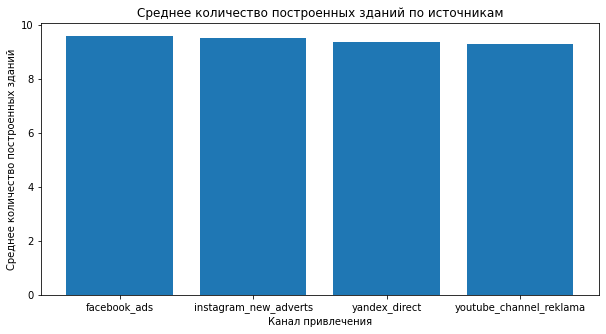

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(t['source'],t['avg_bild'])
plt.title('Среднее количество построенных зданий по источникам')
plt.xlabel('Канал привлечения')
plt.ylabel('Среднее количество построенных зданий')
plt.xticks(t['source'])
plt.show()

В среднем игроки в распределении по каналам строят одинаковое количество зданий. А вот "цена" каждого построенного здания самая выгодная у ютуба, а самая дорогая у фейсбука. 

По количеству построенных зданий с среднем на пользователя пришедшего с разных каналов я сделал выше, посмотрим по времени игры:

In [ ]:
time = df[['user_id', 'event']].merge(df, on ='user_id', how = 'left')
time = time.groupby('user_id')['event_datetime'].agg(['min', 'max']).reset_index()
time['delta'] = time['max']-time['min']
time.head(1)

,user_id,min,max,delta
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,14 days 10:18:29


In [ ]:
time = time.merge(user, on = 'user_id', how = 'left')
time.head(1)

,user_id,min,max,delta,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,14 days 10:18:29,facebook_ads


In [ ]:
time_source = time.groupby('source')['delta'].agg(['mean','median']).reset_index()
time_source.head(1)

,source,mean,median
0,facebook_ads,10 days 17:33:18.731474688,10 days 12:53:30.500000


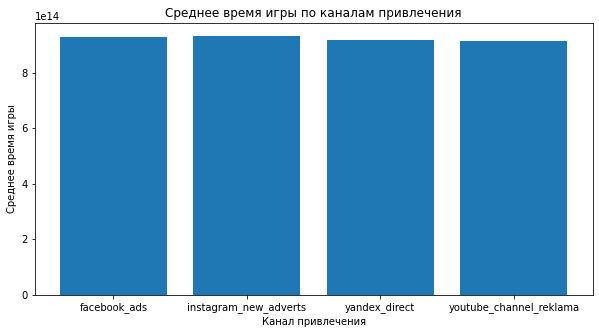

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(time_source['source'],time_source['mean'])
plt.title('Среднее время игры по каналам привлечения')
plt.xlabel('Канал привлечения')
plt.ylabel('Среднее время игры')
plt.xticks(time_source['source'])
plt.show()

Среднее время игры и медианное почти не отличается от канала к каналу.

### Вывод

Получается,что дешевле всего обходятся игроки пришедшие по ссылке с ютуба, на втором месте яндекс. Тоже самое мы можем сказать про затраты из рекламного бюджев в отношении строительства зданий(а этот тот самый экран, показ которого мы хотим монетизировать). Яндекс на втором месте по этим показателям. Можно смело рекомендовать снять рекламу с инстаграма и фейсбука, и увеличить рекламные бюджеты ютуба и яндекса.

## Проверка гипотез

### Время завершения уровня различается в зависимости способа прохождения(через реализацию проекта или через победу над первым игроком).
Н0 - не отличается
Н1 - отличается

In [ ]:
df.head(1)

,event_datetime,event,building_type,user_id,project_type,level_up
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0


In [ ]:
user.head(1)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads


Получим две таблицы: одну для исследователей, другую победивших врага, воспользуемся кодом из прошлых исследований:

In [ ]:
data = df_lvlup.drop(columns=['event_datetime', 'building_type', 'project_type', 'level_up']).reset_index(drop=True)
user_event = data.groupby('user_id')['event'].count().reset_index().sort_values(by='event')
user_event.head(3)

,user_id,event
0,001d39dc-366c-4021-9604-6a3b9ff01e25,1
3544,9be412b2-c124-4062-baee-a81eb3f1e7fb,1
3542,9bd894a2-d5fd-42f9-9e07-fedaa9b5aaa8,1


In [ ]:
t = df[['user_id', 'event']].merge(df, on ='user_id', how = 'left')
t = t.groupby('user_id')['event_datetime'].agg(['min', 'max']).reset_index()
t['delta'] = t['max']-t['min']
t.head(3)

,user_id,min,max,delta
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,14 days 10:18:29
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,12 days 07:37:40
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,8 days 15:12:35


In [ ]:
t = t.merge(user_event, on = 'user_id')
t.head()

,user_id,min,max,delta,event
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42,1
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,12 days 13:16:45,1
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,12 days 18:50:05,1
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,11 days 07:26:32,1
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,6 days 01:58:52,1


В st.ttest_ind не получается подать данные в формате timedelta, поэтому переведем их в секунды и сравним:

In [ ]:
t['delta'][0].total_seconds()

556722.0

In [ ]:
t['delta_sec'] = t['delta'].apply(lambda x: x.total_seconds())
t.head(3)

,user_id,min,max,delta,event,delta_sec
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42,1,556722.00
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,12 days 13:16:45,1,1084605.00
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,12 days 18:50:05,1,1104605.00


In [ ]:
t1 = t[t['event'] == 1]
t2 = t[t['event'] == 2]

In [ ]:
np.array(t1['delta_sec'])


array([ 556722., 1084605., 1104605., ..., 1153051.,  677815.,  730603.])

In [ ]:
sample_1 = np.array(t1['delta_sec'])
sample_2 = np.array(t2['delta_sec'])

alpha = .05 

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 7.256845329495443e-98
Отвергаем нулевую гипотезу


### Время завершения уровня различается в зависимости от канала привлечения(рассмотрим выборку из самого выгодного канала и выборку из всех остальных каналов)
Н0 - не отличается Н1 - отличается

In [ ]:
time = df[df['level_up'] == 1][['user_id', 'event']].merge(df, on ='user_id', how = 'left')
time = time.groupby('user_id')['event_datetime'].agg(['min', 'max']).reset_index()
time['delta'] = time['max']-time['min']
time.head(1)

,user_id,min,max,delta
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42


In [ ]:
time_source = time.merge(user, on = 'user_id', how = 'left')
time_source.head(1)

,user_id,min,max,delta,source
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42,instagram_new_adverts


 Так как самый выгодный канал это ютуб, то будем сравнивать остальные каналы с ним. И так же переведем timedelta в секунды.

In [ ]:
time_source['delta_sec'] = time_source['delta'].apply(lambda x: x.total_seconds())
time_source.head(3)

,user_id,min,max,delta,source,delta_sec
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42,instagram_new_adverts,556722.00
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,12 days 13:16:45,instagram_new_adverts,1084605.00
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,12 days 18:50:05,facebook_ads,1104605.00


In [ ]:
t1=time_source[time_source['source'] == 'youtube_channel_reklama']
t2=time_source[time_source['source'] != 'youtube_channel_reklama']

In [ ]:
sample_1 = np.array(t1['delta_sec'])
sample_2 = np.array(t2['delta_sec'])

alpha = .05 

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.6567642315842651
Не получилось отвергнуть нулевую гипотезу


### Вывод

В результате проверки гипотез мы определели, что разница во времени завершения уровня в зависимости от способа прохождения различается статистически значимо, а в зависимости от канала привлечения статистически значимых различий нет. В обоих случаях уровень статистической значимости = 0.05